In [1]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

from tools.hh_experiments_loading import load_tsp_results, load_exp, exp_progress_loader, exp_chronics_loader

In [2]:
sns.set(context='talk', font_scale=0.9, rc={'figure.figsize':(20,9)})

In [30]:
#loading the experiments of tree-shaped search space
tree_process, tree_final = load_tsp_results("./dumps/1st benchmark/", exp_progress_loader)

llh_selection = {
    "4.1.1" : "py.ES",
    "4.1.2" : "py.ES",
    "4.1.3" : "py.ES",
    "4.1.4" : "py.ES",
    "4.1.5" : "py.ES",
    "4.2.1" : "py.SA",
    "4.2.2" : "py.SA",
    "4.2.3" : "py.SA",
    "4.2.4" : "py.SA",
    "4.2.5" : "py.SA",
    "4.3.1" : "j.ES",
    "4.3.2" : "j.ES",
    "4.3.3" : "j.ES",
    "4.3.4" : "j.ES",
    "4.3.5" : "j.ES",
    "1.1."  : "Random",
    "1.2."  : "Random",
    "2.1."  : "HH",
    "2.2."  : "FRAMAB",
    "3.1."  : "HH",
    "3.2."  : "BRR",
    "1.3."  : "Random",
    "2.4."  : "FRAMAB-H",
    "2.5."  : "FRAMAB-H",
    "3.4."  : "BRR-H",
    "3.5."  : "BRR-H",
    "5.4."  : "TPE-S",
    "5.5."  : "BRR-S",
    "4.1.6" : "py.ES",
    "4.1.7" : "py.ES",
    "4.2.6" : "py.SA",
    "4.2.7" : "py.SA",
    "4.3.6" : "j.ES",
    "4.3.7" : "j.ES"
}

parameter_selection = {
    "4.1.1" : "Default",
    "4.1.2" : "Tuned",
    "4.1.3" : "Random",
    "4.1.4" : "H-TPE",
    "4.1.5" : "H-BRR",
    "4.2.1" : "Default",
    "4.2.2" : "Tuned",
    "4.2.3" : "Random",
    "4.2.4" : "H-TPE",
    "4.2.5" : "H-BRR",
    "4.3.1" : "Default",
    "4.3.2" : "Tuned",
    "4.3.3" : "Random",
    "4.3.4" : "H-TPE",
    "4.3.5" : "H-BRR",
    "1.1."  : "Default",
    "1.2."  : "Tuned",
    "2.1."  : "HH-FRAMAB", # Default
    "2.2."  : "Tuned",
    "3.1."  : "HH-BRR", # Default
    "3.2."  : "Tuned",
    "1.3."  : "Random",
    "2.4."  : "FRAMAB-H-TPE",
    "2.5."  : "FRAMAB-H-BRR",
    "3.4."  : "BRR-H-TPE",
    "3.5."  : "BRR-H-BRR",
    "5.4."  : "TPE-S",
    "5.5."  : "BRR-S",
    "4.1.6" : "TPE-S",
    "4.1.7" : "BRR-S",
    "4.2.6" : "TPE-S",
    "4.2.7" : "BRR-S",
    "4.3.6" : "TPE-S",
    "4.3.7" : "BRR-S"
}

code_desc_wo_codes = {
    "4.1.1" : "py.ES default",
    "4.1.2" : "py.ES tuned",
    "4.1.3" : "py.ES random",
    "4.1.4" : "py.ES PC-H-TPE",
    "4.1.5" : "py.ES PC-H-BRR",
    "4.2.1" : "py.SA default",
    "4.2.2" : "py.SA tuned",
    "4.2.3" : "py.SA random",
    "4.2.4" : "py.SA PC-H-TPE",
    "4.2.5" : "py.SA PC-H-BRR",
    "4.3.1" : "j.ES default",
    "4.3.2" : "j.ES tuned",
    "4.3.3" : "j.ES random",
    "4.3.4" : "j.ES PC-H-TPE",
    "4.3.5" : "j.ES PC-H-BRR",
    "1.1."  : "random default",
    "1.2."  : "random tuned",
    "2.1."  : "HH-FRAMAB",
    "2.2."  : "FRAMAB tuned",
    "3.1."  : "HH-BRR",
    "3.2."  : "BRR tuned",
    "1.3."  : "random random",
    "2.4."  : "HH-FRAMAB-PC-H-TPE",
    "2.5."  : "HH-FRAMAB-PC-H-BRR",
    "3.4."  : "HH-BRR-PC-H-TPE",
    "3.5."  : "HH-BRR-PC-H-BRR",
    "5.4."  : "TPE-S",
    "5.5."  : "BRR-S",
    "4.1.6" : "py.ES TPE-S",
    "4.1.7" : "py.ES BRR-S",
    "4.2.6" : "py.SA TPE-S",
    "4.2.7" : "py.SA BRR-S",
    "4.3.6" : "j.ES TPE-S",
    "4.3.7" : "j.ES BRR-S"
}
tree_process["ModelType"] = tree_process["Code"].apply(lambda x: code_desc_wo_codes[x])
tree_final["ModelType"] = tree_final["Code"].apply(lambda x: code_desc_wo_codes[x])

tree_process.replace(to_replace={"MHjMetalPyES": "pyES", "MHjMetalPySA": "pySA", "MHjMetalES": "jES"}, inplace=True)
tree_final.replace(to_replace={"MHjMetalPyES": "pyES", "MHjMetalPySA": "pySA", "MHjMetalES": "jES"}, inplace=True)
tree_process["Search space"] = "Tree-shaped"
tree_final["Search space"] = "Tree-shaped"

/home/dmitrii/work/projects/git/ThesesTeam2017/YevSem/tud_master_benchmarks/tools/hh_experiments_loading.py:296: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  repetition_final_results['Repetition'] = repetition
/home/dmitrii/.local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [31]:
tree_final

,Mode,Repetition,improvement,iteration,objective,Code,Experiment Group,TSP instance,Optimum,ModelType,Search space
336,pyES,0.0,0.308829,336.0,1.344860e+05,4.1.1,MH,kroA100.tsp,21282,py.ES default,Tree-shaped
336,pyES,1.0,0.307124,336.0,1.340770e+05,4.1.1,MH,kroA100.tsp,21282,py.ES default,Tree-shaped
336,pyES,2.0,0.333796,336.0,1.329970e+05,4.1.1,MH,kroA100.tsp,21282,py.ES default,Tree-shaped
336,pyES,3.0,0.324750,336.0,1.340750e+05,4.1.1,MH,kroA100.tsp,21282,py.ES default,Tree-shaped
336,pyES,4.0,0.310454,336.0,1.351690e+05,4.1.1,MH,kroA100.tsp,21282,py.ES default,Tree-shaped
...,...,...,...,...,...,...,...,...,...,...,...
70,HH,4.0,0.011285,70.0,1.909775e+09,3.5.,HH-PC,pla7397.tsp,23260728,HH-BRR-PC-H-BRR,Tree-shaped
70,HH,5.0,0.030554,70.0,1.814980e+09,3.5.,HH-PC,pla7397.tsp,23260728,HH-BRR-PC-H-BRR,Tree-shaped
76,HH,6.0,0.003092,76.0,1.749227e+09,3.5.,HH-PC,pla7397.tsp,23260728,HH-BRR-PC-H-BRR,Tree-shaped
75,HH,7.0,0.009436,75.0,1.636058e+09,3.5.,HH-PC,pla7397.tsp,23260728,HH-BRR-PC-H-BRR,Tree-shaped


In [40]:
# loading the results of flat search space
exps_flrd = "./dumps/flat_bench/"
flat_chronics = pd.DataFrame()
flat_process = pd.DataFrame()
flat_final = pd.DataFrame()

from core_entities.configuration import Configuration

for e_file_name in os.listdir(exps_flrd):
    expnt = load_exp(exps_flrd + e_file_name)
    ed = expnt.description
    Configuration.set_task_config(expnt.description["TaskConfiguration"])
    
    chronic = exp_chronics_loader(expnt)
    progres = exp_progress_loader(expnt)
    final = progres.iloc[-1]
    
    mode = ed["DomainDescription"]["DataFile"][ed["DomainDescription"]["DataFile"].rfind("/") +1 : ed["DomainDescription"]["DataFile"].rfind("Data")]
    model = ed["ModelConfiguration"]["ModelType"]
    tsp_instance = ed["TaskConfiguration"]["Scenario"]["problem_initialization_parameters"]["instance"]
    tsp_instance = tsp_instance[tsp_instance.rfind("/") + 1:]
    
    # if it is needed to differentiate the repetitions
    #if e_file_name.rfind("(") == -1: repetition = 0
    #else: repetition = int(e_file_name[e_file_name.rfind("(") + 1:e_file_name.rfind(")")]) + 1

    for ed in [chronic, progres, final]:
        ed["Mode"] = mode
        ed["ModelType"] = mode +  " " + model
        ed["TSP instance"] = tsp_instance
        if mode == "HH":
            ed["Experiment Group"] = "HH-PC"
            if model == "brr":
                ed["Code"] = "5.4."
            if model == "BO":
                ed["Code"] = "5.5."
            continue
        if mode == "pyES": 
            ed["Experiment Group"] = "MH-PC"
            if model == "brr":
                ed["Code"] = "4.1.7"
            if model == "BO":
                ed["Code"] = "4.1.6"
            continue    
        if mode == "pySA":  
            ed["Experiment Group"] = "MH-PC"
            if model == "brr":
                ed["Code"] = "4.2.7"
            if model == "BO":
                ed["Code"] = "4.2.6"
            continue
        if mode == "jES": 
            ed["Experiment Group"] = "MH-PC"
            if model == "brr":
                ed["Code"] = "4.3.7"
            if model == "BO":
                ed["Code"] = "4.3.6"
            continue
        #ed["Repetition"] = repetition
    flat_chronics = flat_chronics.append(chronic, sort=False)
    flat_process = flat_process.append(progres, sort=False)
    flat_final = flat_final.append(final, sort=False)

flat_chronics["Search space"] = "Flat"
flat_process["Search space"] = "Flat"
flat_final["Search space"] = "Flat"

/home/dmitrii/.local/lib/python3.7/site-packages/ipykernel_launcher.py:28: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/dmitrii/.local/lib/python3.7/site-packages/ipykernel_launcher.py:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/dmitrii/.local/lib/python3.7/site-packages/pandas/core/indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)
/home/dmitrii/.local/lib/python3.7

In [41]:
tsp_problems = ["kroA100.tsp", "pr439.tsp", "rat783.tsp", "pla7397.tsp"]
tsp_problems

['kroA100.tsp', 'pr439.tsp', 'rat783.tsp', 'pla7397.tsp']

In [42]:
flat_process

,objective,improvement,iteration,Mode,ModelType,TSP instance,Experiment Group,Code,Search space
0,1.775610e+06,0.000000,0,HH,HH BO,pr439.tsp,HH-PC,5.5.,Flat
1,1.775610e+06,0.000000,1,HH,HH BO,pr439.tsp,HH-PC,5.5.,Flat
2,6.774260e+05,0.664538,2,HH,HH BO,pr439.tsp,HH-PC,5.5.,Flat
3,4.487710e+05,0.767750,3,HH,HH BO,pr439.tsp,HH-PC,5.5.,Flat
4,4.487710e+05,0.767750,4,HH,HH BO,pr439.tsp,HH-PC,5.5.,Flat
...,...,...,...,...,...,...,...,...,...
49,2.733079e+09,0.021093,49,pyES,pyES brr,pla7397.tsp,MH-PC,4.1.7,Flat
50,2.733079e+09,0.021093,50,pyES,pyES brr,pla7397.tsp,MH-PC,4.1.7,Flat
51,2.733079e+09,0.021093,51,pyES,pyES brr,pla7397.tsp,MH-PC,4.1.7,Flat
52,2.733079e+09,0.021093,52,pyES,pyES brr,pla7397.tsp,MH-PC,4.1.7,Flat


In [43]:
joined_final = flat_final.append(tree_final, sort=False) # does not modifies old dataframe, but returns updated dataframe
joined_processes = flat_process.append(tree_process, sort=False)

In [74]:
tsp_problems = [
        "kroA100.tsp",
        "pr439.tsp",
        "rat783.tsp",
        "pla7397.tsp",
    ]
instances_optimums = {
        "eil51.tsp":    426,
        "kroA100.tsp":  21282,
        "kroA150.tsp":  26524,
        "kroB200.tsp":  29437,
        "pr439.tsp":    107217,
        "rat783.tsp":   8806,
        "pla7397.tsp":  23260728,
        "d15112.tsp":   1573084
    }

# to see also optimums
instances_boundaries = {
        "kroA100.tsp":  (20000,115282),
        "pr439.tsp":    (97217, 552170),
        "rat783.tsp":   (806, 90000),
        "pla7397.tsp":  (1260728, 3e9),
    }

# to beter see graphs
zoomed_boundaries = {
        "kroA100.tsp":  (20000,45282),
        "pr439.tsp":    (260217, 502170),
        "rat783.tsp":   (22006, 60000),
        "pla7397.tsp":  (0.6e9, 2e9),
    }

In [75]:
for tsp_instance in tsp_problems:
        
    # --- Intermediate results ---
    condition = (joined_processes["TSP instance"] == tsp_instance) & ((joined_processes["Experiment Group"] == "MH") | (joined_processes["Experiment Group"] == "MH-PC")) & (joined_processes["Code"] != "4.1.3") & (joined_processes["Code"] != "4.2.3") & (joined_processes["Code"] != "4.3.3") & (joined_processes["Code"] != "1.1.") & (joined_processes["Code"] != "1.2.") &(joined_processes["Code"] != "1.3.") & (joined_processes["Code"] != "2.2.") & (joined_processes["Code"] != "3.2.")
    blp = joined_processes[condition].copy(deep=True)
    
    blp["parameters"] = blp["Code"].apply(lambda x: parameter_selection[x])
blp

,objective,improvement,iteration,Mode,ModelType,TSP instance,Experiment Group,Code,Search space,Repetition,Optimum,parameters
0,2.767876e+09,0.000000,0,pyES,pyES BO,pla7397.tsp,MH-PC,4.1.6,Flat,NaN,NaN,TPE-S
1,2.767876e+09,0.000000,1,pyES,pyES BO,pla7397.tsp,MH-PC,4.1.6,Flat,NaN,NaN,TPE-S
2,2.735484e+09,0.036686,2,pyES,pyES BO,pla7397.tsp,MH-PC,4.1.6,Flat,NaN,NaN,TPE-S
3,2.735484e+09,0.036686,3,pyES,pyES BO,pla7397.tsp,MH-PC,4.1.6,Flat,NaN,NaN,TPE-S
4,2.735484e+09,0.036686,4,pyES,pyES BO,pla7397.tsp,MH-PC,4.1.6,Flat,NaN,NaN,TPE-S
...,...,...,...,...,...,...,...,...,...,...,...,...
282,1.063949e+09,0.003443,282,jES,j.ES PC-H-BRR,pla7397.tsp,MH-PC,4.3.5,Tree-shaped,8.0,23260728.0,H-BRR
283,1.063949e+09,0.003443,283,jES,j.ES PC-H-BRR,pla7397.tsp,MH-PC,4.3.5,Tree-shaped,8.0,23260728.0,H-BRR
284,1.063949e+09,0.003443,284,jES,j.ES PC-H-BRR,pla7397.tsp,MH-PC,4.3.5,Tree-shaped,8.0,23260728.0,H-BRR
285,1.063949e+09,0.003443,285,jES,j.ES PC-H-BRR,pla7397.tsp,MH-PC,4.3.5,Tree-shaped,8.0,23260728.0,H-BRR


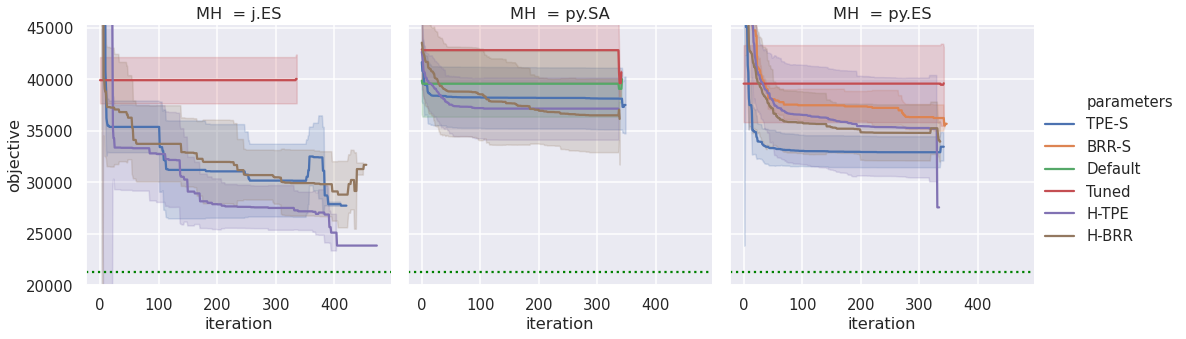

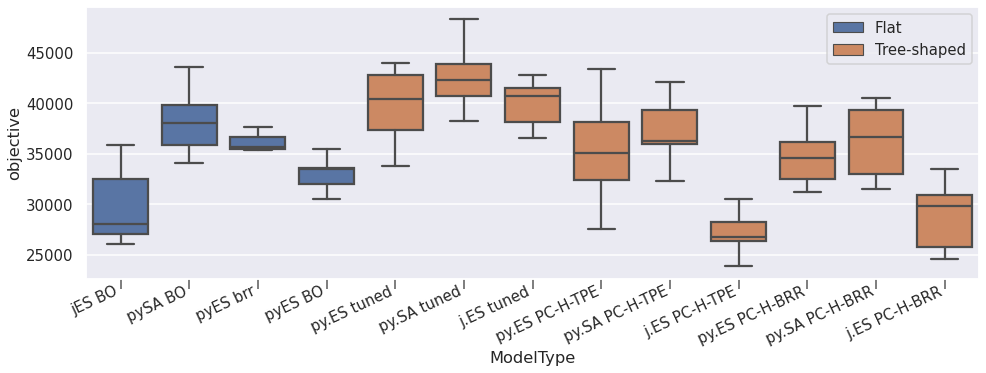

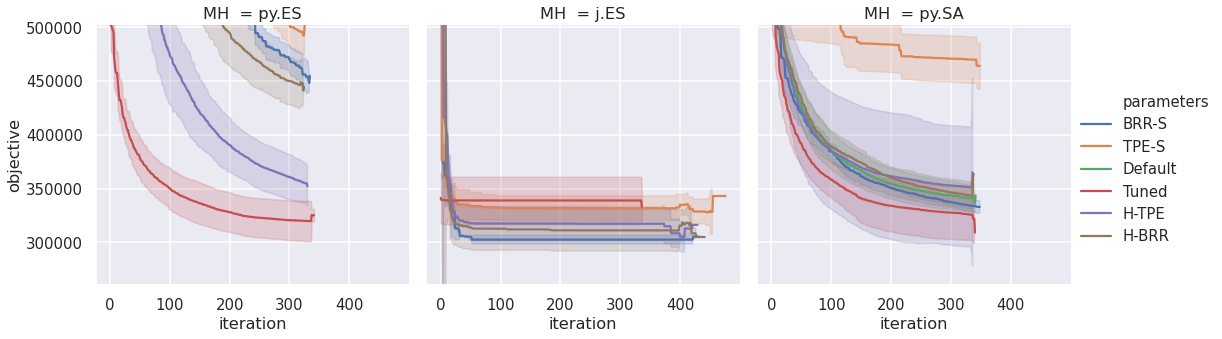

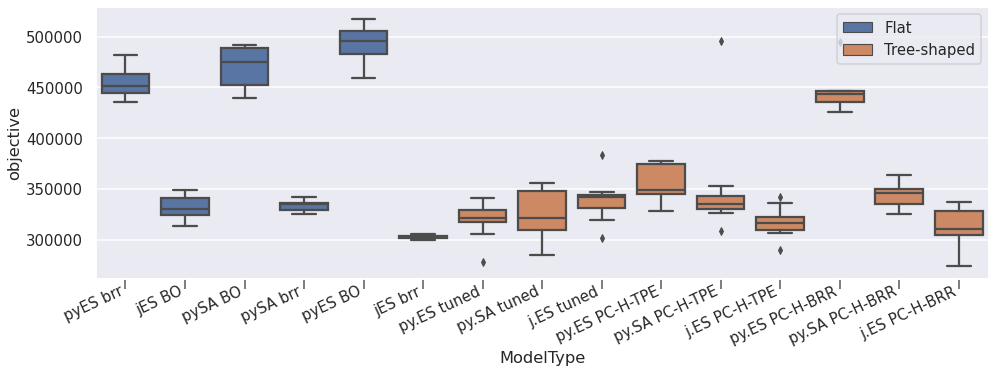

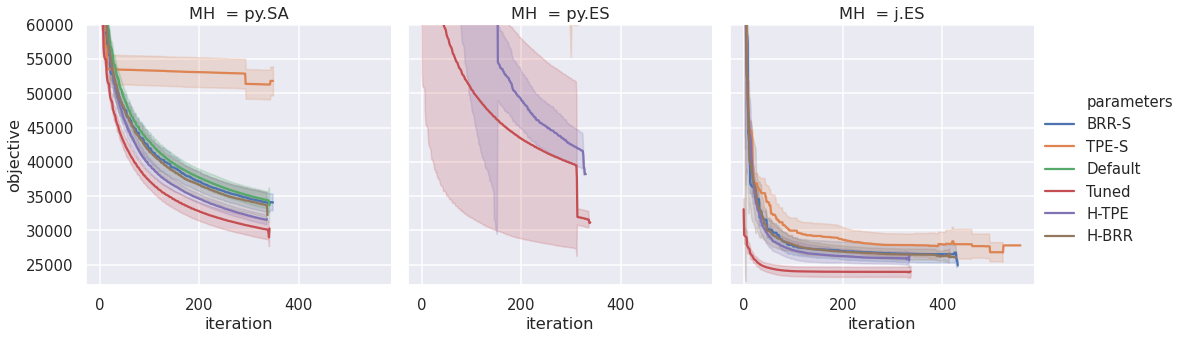

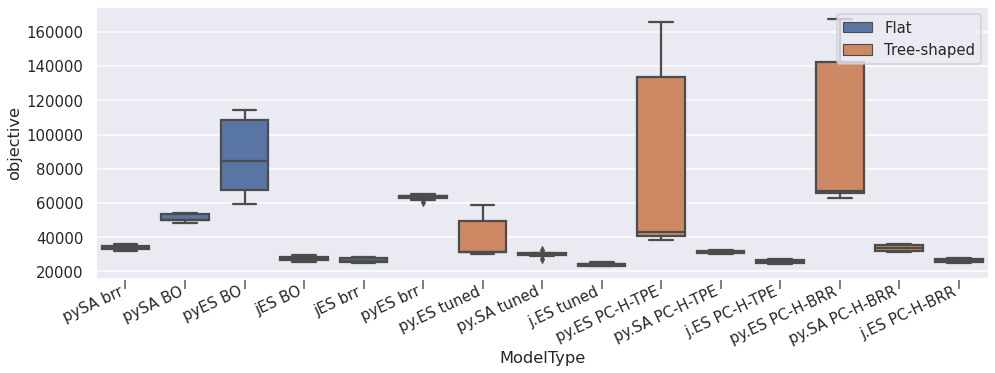

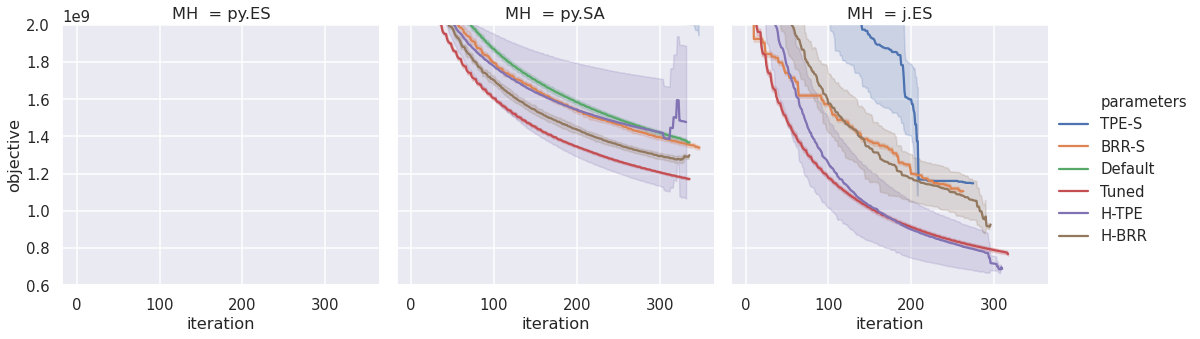

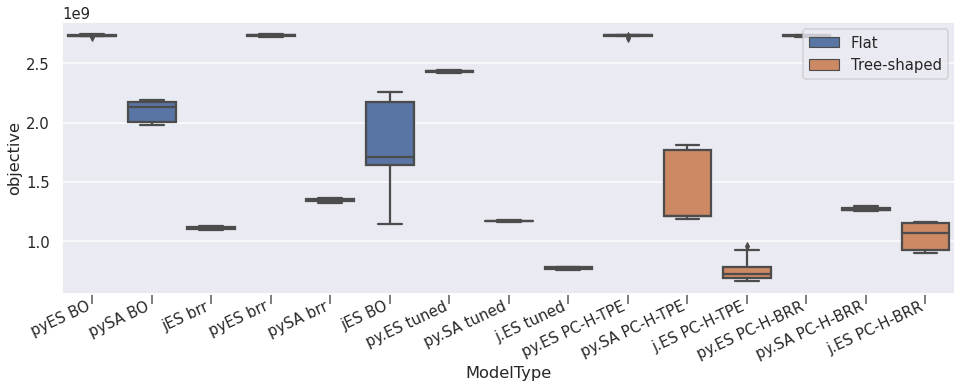

In [76]:
for tsp_instance in tsp_problems:
    # --- Intermediate results ---
    condition = (joined_processes["TSP instance"] == tsp_instance) & ((joined_processes["Experiment Group"] == "MH") | (joined_processes["Experiment Group"] == "MH-PC")) & (joined_processes["Code"] != "4.1.3") & (joined_processes["Code"] != "4.2.3") & (joined_processes["Code"] != "4.3.3") & (joined_processes["Code"] != "1.1.") & (joined_processes["Code"] != "1.2.") &(joined_processes["Code"] != "1.3.") & (joined_processes["Code"] != "2.2.") & (joined_processes["Code"] != "3.2.")
    blp = joined_processes[condition].copy(deep=True)
    blp["MH "] = blp["Code"].apply(lambda x: llh_selection[x])
    blp["parameters"] = blp["Code"].apply(lambda x: parameter_selection[x])
    prog_plot = sns.relplot(x="iteration", y='objective', col="MH ", col_wrap=3,
                            kind="line", ci="sd", hue="parameters", # estimator=None, units="Repetition",
                            #palette=sns.color_palette("deep", all_processes[condition]["Scenario"].unique().shape[0]),
                            data=blp
                           )

    [ax.axhline(instances_optimums[tsp_instance], color='green', ls=':').set_label("optimum") for ax in prog_plot.axes]
    #[ax.axhline(instances_optimums[tsp_instance], color='green', ls='--').set_label("optimum") for ax in g.axes[0]]
    prog_plot.set(ylim=(zoomed_boundaries[tsp_instance][0], zoomed_boundaries[tsp_instance][1]))
    plt.savefig(fname=f"plots/control/{tsp_instance[:-4]} PC progress.svg", dpi=500, bbox_inches='tight')
    #plt.show()
    
#for tsp_instance in ["kroA100.tsp"]:
    condition = (joined_final["TSP instance"] == tsp_instance) & (joined_final["Mode"] != "HH") & (joined_final["Code"] != "4.1.3") & (joined_final["Code"] != "4.2.3") & (joined_final["Code"] != "4.3.3") & (joined_final["Code"] != "1.1.") & (joined_final["Code"] != "1.2.") &(joined_final["Code"] != "1.3.") & (joined_final["Code"] != "2.2.") & (joined_final["Code"] != "3.2.")& (joined_final["Code"] != "4.1.1")& (joined_final["Code"] != "4.2.1")& (joined_final["Code"] != "4.3.1")
    blf = joined_final[condition].copy(deep=True)
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16, 5), 
                             sharey=True,
                             gridspec_kw={'wspace':0.01}
                            )
    g = sns.boxplot(x="ModelType", y='objective', 
                    hue="Search space",
                    dodge=False, 
                    data=blf,
                    ax=axes
                   )
    #g.axes.axhline(instances_optimums[tsp_instance], color='green', ls='--').set_label("optimum")
    #g.set(ylim=(zoomed_boundaries[tsp_instance][0], zoomed_boundaries[tsp_instance][1]))
    g.xaxis.set_ticks_position('bottom')
    g.xaxis.set_tick_params(color='gray', pad=-5, width=2, length=10)
    g.set_xticklabels(g.get_xticklabels(), rotation=25, horizontalalignment='right')
    axes.legend(loc=1)
    plt.show()

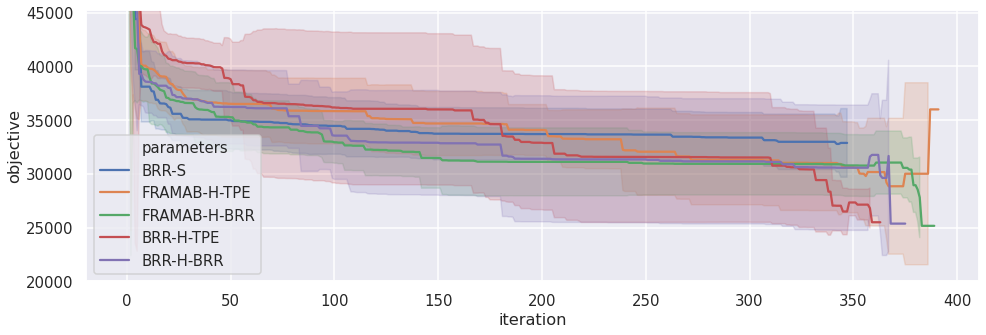

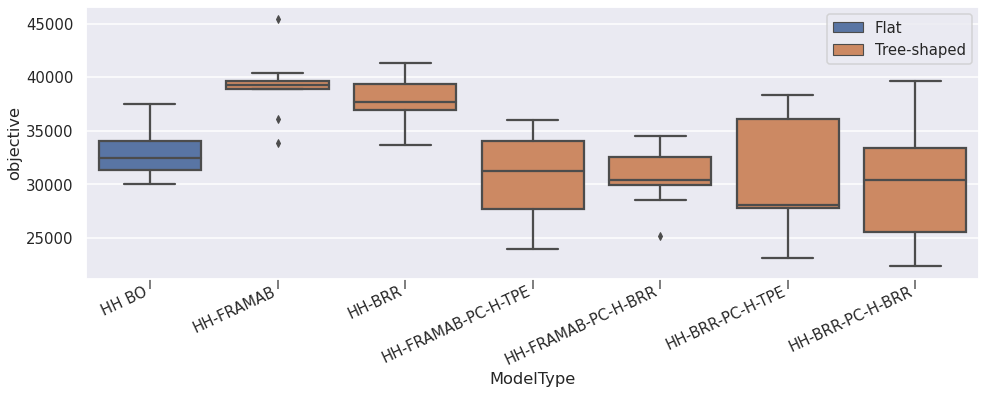

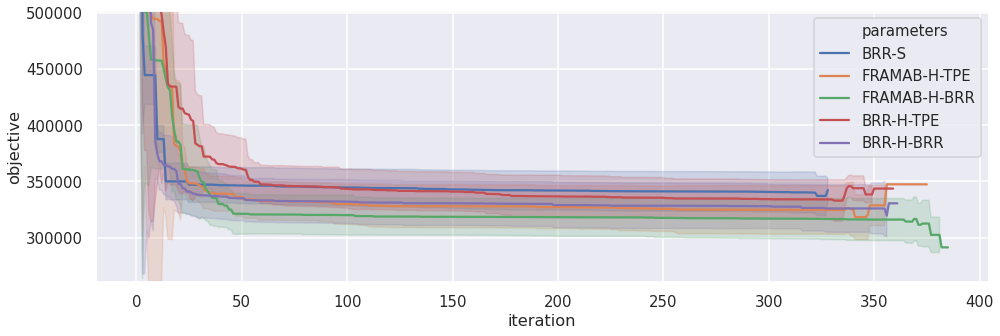

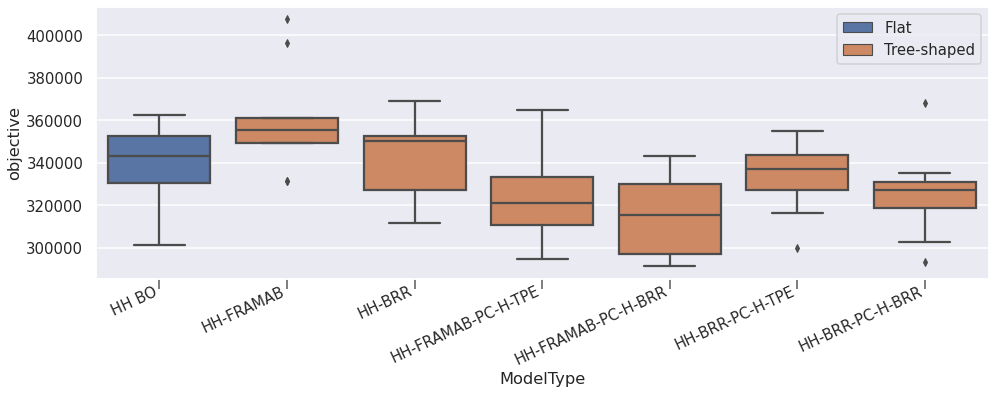

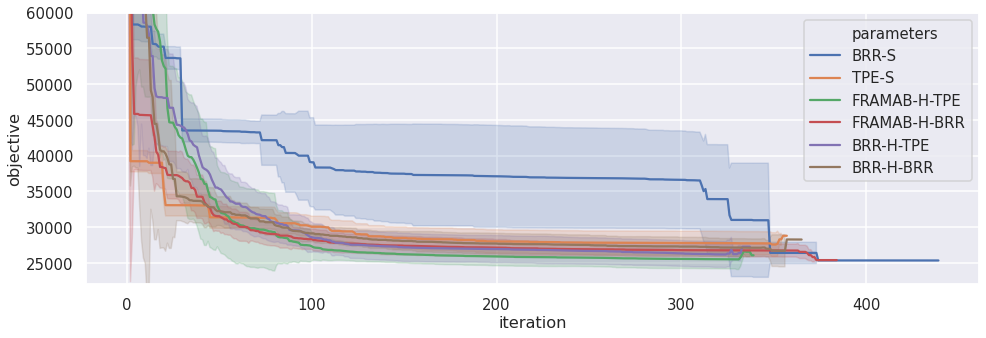

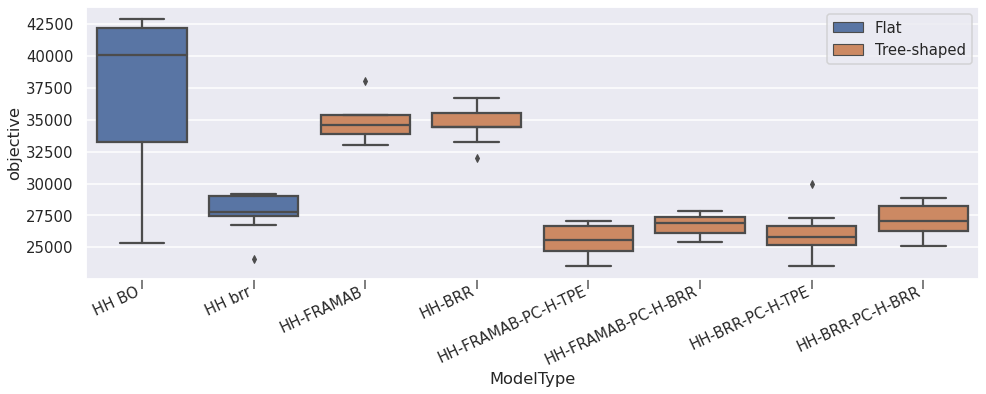

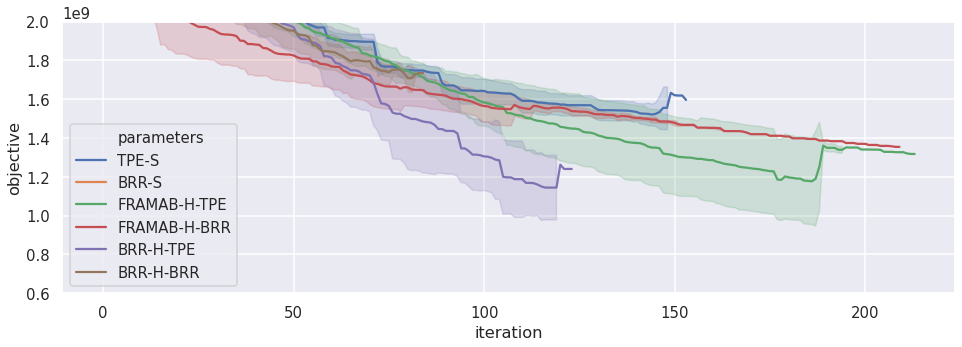

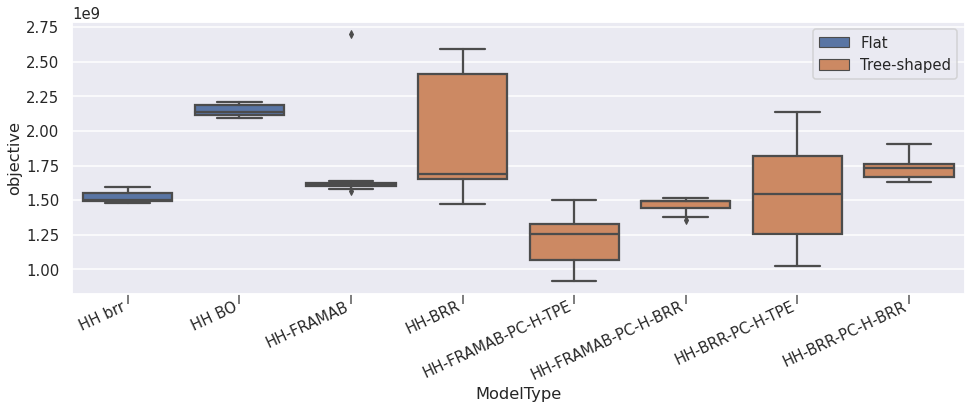

In [77]:
for tsp_instance in tsp_problems:
    # --- Intermediate results ---
    condition = (joined_processes["TSP instance"] == tsp_instance) & (joined_processes["Experiment Group"] == "HH-PC") & (joined_processes["Code"] != "4.1.3") & (joined_processes["Code"] != "4.2.3") & (joined_processes["Code"] != "4.3.3") & (joined_processes["Code"] != "1.1.") & (joined_processes["Code"] != "1.2.") &(joined_processes["Code"] != "1.3.") & (joined_processes["Code"] != "2.2.") & (joined_processes["Code"] != "3.2.")
    blp = joined_processes[condition].copy(deep=True)
    blp["MH "] = "HH"
    blp["parameters"] = blp["Code"].apply(lambda x: parameter_selection[x])
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16, 5), 
                         sharey=True,
                         gridspec_kw={'wspace':0.01}
                        )
    prog_plot = sns.lineplot(x="iteration", y='objective', 
                        ci='sd', hue="parameters", # estimator=None, units="Repetition",
                        data=blp, ax=axes)
#     prog_plot = sns.lineplot(x="iteration", y='objective', col="MH ", col_wrap=1,
#                             kind="line", ci="sd", hue="parameters", # estimator=None, units="Repetition",
#                             #palette=sns.color_palette("deep", all_processes[condition]["Scenario"].unique().shape[0]),
#                             data=blp
#                            )

#     [ax.axhline(instances_optimums[tsp_instance], color='green', ls=':').set_label("optimum") for ax in prog_plot.axes]
    #[ax.axhline(instances_optimums[tsp_instance], color='green', ls='--').set_label("optimum") for ax in g.axes[0]]
    prog_plot.set(ylim=(zoomed_boundaries[tsp_instance][0], zoomed_boundaries[tsp_instance][1]))
    plt.savefig(fname=f"plots/hh-pc/{tsp_instance[:-4]}_hh-PC_progress.svg", dpi=500, bbox_inches='tight')
    #plt.show()
    
#for tsp_instance in ["kroA100.tsp"]:
    condition = (joined_final["TSP instance"] == tsp_instance) & (joined_final["Mode"] == "HH")& (joined_final["Code"] != "4.1.3") & (joined_final["Code"] != "4.2.3") & (joined_final["Code"] != "4.3.3") & (joined_final["Code"] != "1.1.") & (joined_final["Code"] != "1.2.") &(joined_final["Code"] != "1.3.") & (joined_final["Code"] != "2.2.") & (joined_final["Code"] != "3.2.")& (joined_final["Code"] != "4.1.1")& (joined_final["Code"] != "4.2.1")& (joined_final["Code"] != "4.3.1")
    blf = joined_final[condition].copy(deep=True)
    fig, axes = plt.subplots(nrows=1, ncols=1, figsize=(16, 5), 
                             sharey=True,
                             gridspec_kw={'wspace':0.01}
                            )
    g = sns.boxplot(x="ModelType", y='objective', 
                    hue="Search space",
                    dodge=False, 
                    data=blf,
                    ax=axes
                   )
    #g.axes.axhline(instances_optimums[tsp_instance], color='green', ls='--').set_label("optimum")
    #g.set(ylim=(zoomed_boundaries[tsp_instance][0], zoomed_boundaries[tsp_instance][1]))
    g.xaxis.set_ticks_position('bottom')
    g.xaxis.set_tick_params(color='gray', pad=-5, width=2, length=10)
    g.set_xticklabels(g.get_xticklabels(), rotation=25, horizontalalignment='right')
    axes.legend(loc=1)
    plt.show()